In [2]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [3]:
data = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv', header=0)
data.insert(loc=0, column='rank', value=range(1, data.shape[0] + 1))
print(data.shape)
data.head()

(16719, 17)


,rank,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
data.describe()

,rank,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16719.000000,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,8360.000000,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,4826.503911,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,4180.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,8360.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,12539.500000,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,16719.000000,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [4]:
scatter_matrix(data)
pass

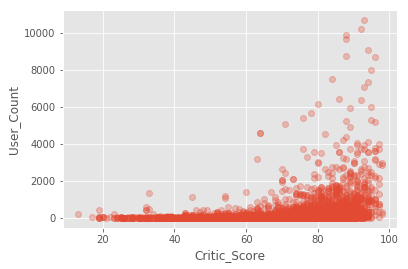

In [5]:
plt.plot(data['Critic_Score'], data['User_Count'], 'o', alpha=0.3)
plt.xlabel('Critic_Score')
plt.ylabel('User_Count')
pass

### Prepare Data

In [86]:
data.count(axis=0)

rank               16719
Name               16717
Platform           16719
Year_of_Release    16450
Genre              16717
Publisher          16665
NA_Sales           16719
EU_Sales           16719
JP_Sales           16719
Other_Sales        16719
Global_Sales       16719
Critic_Score        8137
Critic_Count        8137
User_Score         10015
User_Count          7590
Developer          10096
Rating              9950
dtype: int64

In [4]:
data.drop(['Name', 'NA_Sales', 'JP_Sales', 'EU_Sales', 'Other_Sales', 'Global_Sales'], axis=1, inplace=True)
data.dropna(inplace=True)
data.count()

rank               6825
Platform           6825
Year_of_Release    6825
Genre              6825
Publisher          6825
Critic_Score       6825
Critic_Count       6825
User_Score         6825
User_Count         6825
Developer          6825
Rating             6825
dtype: int64

In [5]:
print(data['User_Score'].dtypes)
data['User_Score'] = data['User_Score'].astype(float)
print(data['User_Score'].dtypes)

object
float64


In [6]:
print(data[data['Rating'] == 'RP'].count())
data.drop(data[data['Rating'] == 'RP'].index, inplace=True)

rank               1
Platform           1
Year_of_Release    1
Genre              1
Publisher          1
Critic_Score       1
Critic_Count       1
User_Score         1
User_Count         1
Developer          1
Rating             1
dtype: int64


In [7]:
print(data['Rating'].unique())
data['Rating'] = data['Rating'].map({'E': 0, 'K-A': 0, 'E10+': 1, 'T': 2, 'M': 3, 'AO': 4})
print(data['Rating'].unique())

['E' 'M' 'T' 'E10+' 'AO' 'K-A']
[0 3 2 1 4]


In [8]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['Platform', 'Genre', 'Publisher', 'Developer']
['rank', 'Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Rating']


In [9]:
data_describe = data.describe(include=[object])
binary_columns = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

[] ['Platform', 'Genre', 'Publisher', 'Developer']


In [10]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
data_nonbinary.columns

Index(['Platform_3DS', 'Platform_DC', 'Platform_DS', 'Platform_GBA',
       'Platform_GC', 'Platform_PC', 'Platform_PS', 'Platform_PS2',
       'Platform_PS3', 'Platform_PS4',
       ...
       'Developer_h.a.n.d. Inc.', 'Developer_iNiS', 'Developer_id Software',
       'Developer_id Software, Nerve Software',
       'Developer_id Software, Raven Software', 'Developer_n-Space',
       'Developer_neo Software', 'Developer_odenis studio',
       'Developer_syn Sophia', 'Developer_zSlide'],
      dtype='object', length=1579)

In [11]:
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean()) / data_numerical.std()
data_numerical.describe()

,rank,Year_of_Release,Critic_Score,Critic_Count,User_Score,User_Count,Rating
count,6824.000000,6.824000e+03,6.824000e+03,6.824000e+03,6.824000e+03,6.824000e+03,6.824000e+03
mean,0.000000,-1.891935e-14,-4.664759e-16,-6.663941e-17,-2.379027e-14,-1.665985e-17,-3.748467e-17
std,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.466968,-5.327587e+00,-4.129489e+00,-1.348989e+00,-4.642708e+00,-2.906435e-01,-1.293464e+00
25%,-0.865696,-8.159536e-01,-5.965080e-01,-7.768021e-01,-4.761556e-01,-2.787280e-01,-1.293464e+00
50%,-0.143195,-1.035905e-01,1.245085e-01,-2.046150e-01,2.182698e-01,-2.514925e-01,4.741536e-01
75%,0.769453,8.462270e-01,7.013216e-01,5.236232e-01,7.043675e-01,-1.459550e-01,4.741536e-01
max,2.232114,2.033499e+00,1.999151e+00,4.372882e+00,1.676563e+00,1.785670e+01,2.241771e+00


In [12]:
data = pd.DataFrame(pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis=1), dtype=int)
print(data.shape)
# data.describe()

(6824, 1586)


In [13]:
X = data.drop(['rank'], axis=1)
y = data['rank']
feature_name = X.columns
N, d = X.shape
print(X.shape, y.shape)

(6824, 1585) (6824,)


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

4776 2048


In [103]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [104]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test = np.mean(y_test != y_test_predict)
print(err_train, err_test)

0.288107202680067 0.3330078125


In [105]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid={'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

KeyboardInterrupt: 

In [ ]:
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test = np.mean(y_test != knn.predict(X_test))

print(err_train, err_test)

In [15]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test = np.mean(y_test != svc.predict(X_test))

print(err_train, err_test)

C:\Users\happy\Anaconda3\envs\ml\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.3896566164154104 0.3916015625


In [ ]:
from sklearn.model_selection import GridSearchCV
Cs = 10.**np.arange(-5, 5)
gamma_array = 10.**np.arange(-5, 5)
svc = SVC()
grid = GridSearchCV(svc, param_grid={'C': Cs, 'gamma': gamma_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)

In [ ]:
svc = SVC(C=best_C).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test = np.mean(y_test != knn.predict(X_test))

print(err_train, err_test)

In [16]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test = np.mean(y_test != rf.predict(X_test))

print(err_train, err_test)

0.018634840871021775 0.3095703125


In [17]:
np.sum(rf.feature_importances_)

1.0000000000000002

(-1, 20)

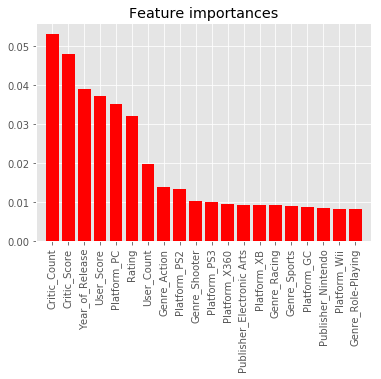

In [18]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

d_first = 20
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align='center', color='r')
plt.xticks(range(d_first), feature_name[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first])

In [19]:
ert = ensemble.ExtraTreesClassifier(n_estimators=100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test = np.mean(y_test != ert.predict(X_test))

print(err_train, err_test)

0.018634840871021775 0.32080078125


In [20]:
ada = ensemble.AdaBoostClassifier(n_estimators=1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.5814489112227805 0.59326171875


In [21]:
gbt = ensemble.GradientBoostingClassifier(n_estimators=1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.1233249581239531 0.30810546875
